In [1]:
import pandas as pd
import seaborn as sns

In [2]:
studying_records = {
    '01/12': 2.0, '02/12': 2.5, '03/12': 2.0, '04/12': 3.5, '05/12': 3.5, '06/12': 2.0, '07/12': 5.0,
    '08/12': 3.0, '09/12': 1.5, '10/12': 2.0, '11/12': 1.5, '12/12': 2.5,
}

In [3]:
studying_records = {
    'date':  ['01/12', '02/12', '03/12', '04/12', '05/12', '06/12', '07/12', '08/12', '09/12', '10/12', '11/12'],
    'hours': [2.0    , 2.5    , 2.0    , 3.5    , 3.5    , 2.0    , 5.0    , 3.0    , 1.5    , 2.0    , 1.5    ]
}

In [4]:
studying_records = pd.DataFrame(studying_records)
studying_records

,date,hours
0,01/12,2.0
1,02/12,2.5
2,03/12,2.0
3,04/12,3.5
4,05/12,3.5
5,06/12,2.0
6,07/12,5.0
7,08/12,3.0
8,09/12,1.5
9,10/12,2.0


<Axes: xlabel='date', ylabel='hours'>

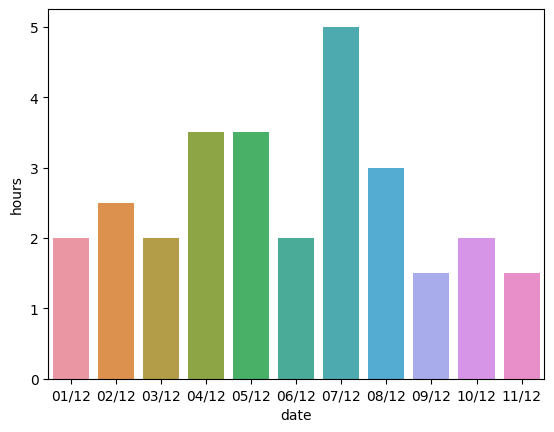

In [5]:
sns.barplot(x = studying_records['date'], y = studying_records['hours'])